# Part II - Ford GoBike System Data Explanatory analysis
## by Naama Benita

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook (i.e., an executive summary). This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights listed here should match those documented at the conclusion of the exploratory analysis notebook. 

In this investigation, I will explore the key factors that influance trip duartions and user behavior in the Ford GoBike system, expanding on the insights from the exploratory analysis.
My main focus will be to understand how different user types, geographic locations, and demographic factors, including age,
contribute to variations in trip duration and usage patterns.
key areas of investigation include:
*What geographic areas are associated with longer trips?
I will examine the spatial distribution of trips to identify areas where longer trips are more frequent and determine if these are linked to specific station or destinations.
*How do age and membership type (Subscriber vs Customer) impact trip duration?
I will analyze how trip duration varies across different age groups, and investigate if there are significant differences between subscribers and customers, particularly in terms of trip frequency and duration.
*Does participation in the bike-share program influnce trip duration?
I will also explore whether users who are part of the bike-share program tend to take longer or shorted trips than those who are not, and how participation impact trip behavior.

## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.

The dataset contain detailed records about trips taken in the Ford GoBike system, including trip duartion, user demographics, geographic coordinates for start and end stations, and bike-share program participation status.
This data will help uncover trend and relationships that can lead to actionable insights, particularly around how geographic locations, user types, and age affect trip durations. The data was filtered to remove outliers, such as extremely long trips, and cleaned of missing values to ensure accurate analysis.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load the dataset
df = pd.read_csv("./201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

I will do some cleaning before visualization

In [3]:
#lets first drop all NuN values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [49]:
#check for outliers
print("Summary statistics before outlier removal:")
print(df[['duration_sec', 'member_birth_year']].describe())

Summary statistics before outlier removal:
        duration_sec  member_birth_year
count  174952.000000      174952.000000
mean      704.002744        1984.803135
std      1642.204905          10.118731
min        61.000000        1878.000000
25%       323.000000        1980.000000
50%       510.000000        1987.000000
75%       789.000000        1992.000000
max     84548.000000        2001.000000


In [4]:
#remove outliers 
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        #Calculate IQR
        IQR= Q3 - Q1 
        
        #Define acceptable range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        #Filter rows where values are within the acceptable range
        df = df[(df[column] >= lower_bound) & (df[column] <=upper_bound)]
        
    return df

#apply the function to remove outliers from 'duration_sec' and 'member_birth_year'
columns_to_check = ['duration_sec', 'member_birth_year']
df = remove_outliers(df, columns_to_check)

In [51]:
#verify statistics after removal function
print("Summary statistics before outlier removal:")
print(df[['duration_sec', 'member_birth_year']].describe())

Summary statistics before outlier removal:
        duration_sec  member_birth_year
count  160279.000000      160279.000000
mean      549.031202        1985.823820
std       303.244147           8.456599
min        61.000000        1962.000000
25%       313.000000        1981.000000
50%       487.000000        1987.000000
75%       729.000000        1992.000000
max      1488.000000        2001.000000


In [5]:
#lets filter  the member_gender to keep only "Male" or "Female" and also to drop rows with NaN value

df = df[df['member_gender'].isin(['Male', 'Female'])].dropna(subset=['member_gender'])

## (Visualization 1)

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Visualization 1- Geospatial Distribution of Trip Duration 
Question: Are there specific geographic areas where longer trips are more common?

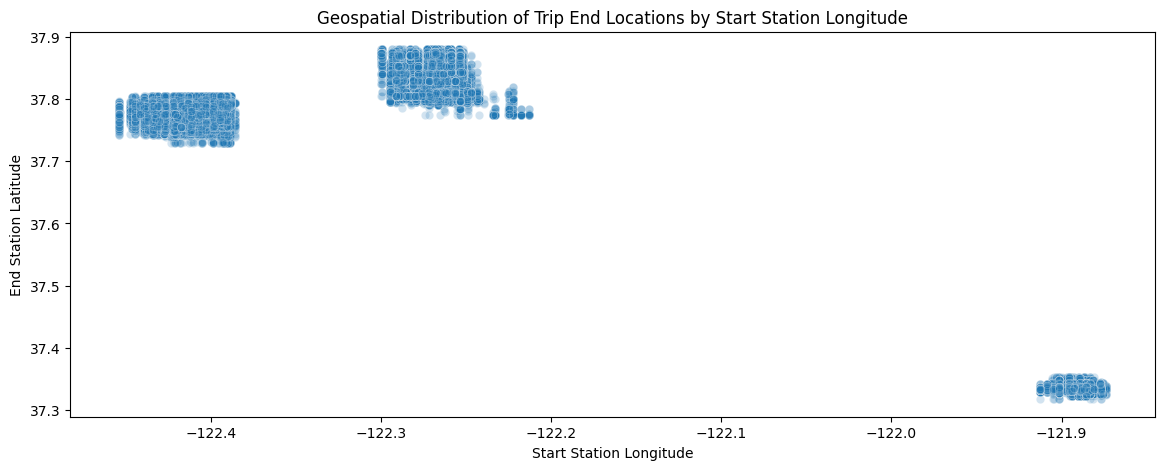

In [6]:
#First I checked  the clusters in google to see where the cluster are
# set plot dimensions
plt.figure(figsize=(14,5))

#Scatter Plot
sns.scatterplot (data =df, x = 'start_station_longitude', y ='end_station_latitude', alpha=0.2)

#Add labels and title
plt.xlabel('Start Station Longitude')
plt.ylabel('End Station Latitude')
plt.title('Geospatial Distribution of Trip End Locations by Start Station Longitude')
plt.show()

In [7]:
#Create new city variable using 2 conditions
#np.where(condition' value if condition is true, value if condition is false)
df['cities'] = np.where( df['start_station_longitude'] <= -122.35, 'San Francisco', np.where(df['start_station_longitude'] <=-122.1, 'Oakland', 'San Jose'))
df['cities'].value_counts()

San Francisco    113798
Oakland           35689
San Jose           7533
Name: cities, dtype: int64

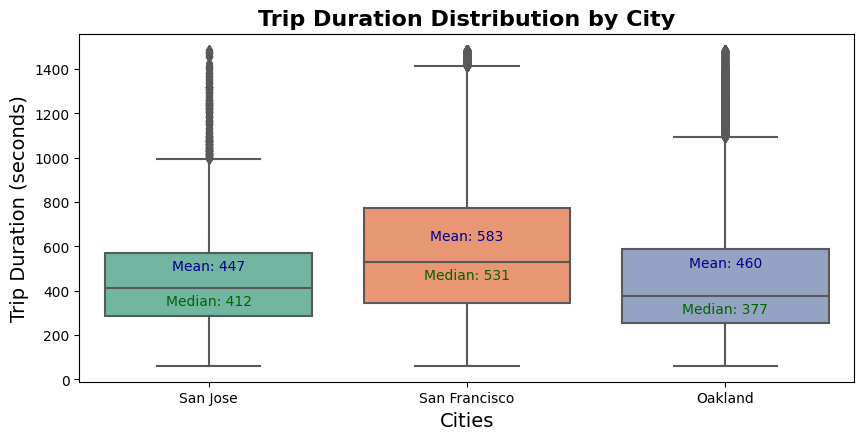

In [8]:
#Creating a box plot to check Trip Duartion distribution by city
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='cities', y='duration_sec', palette='Set2')
#Add labels and title
plt.title('Trip Duration Distribution by City', fontsize=16, fontweight='bold')
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Trip Duration (seconds)', fontsize=14)

#Add mean and median on each box plot 
for i, city in enumerate(df['cities'].unique()):
    mean_duration = df[df['cities'] == city]['duration_sec'].mean()
    median_duration = df[df['cities'] == city]['duration_sec'].median()
    
    ax.text(i, mean_duration + 30, f'Mean: {mean_duration:.0f}', 
            horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='darkblue')
    ax.text(i, median_duration - 30, f'Median: {median_duration:.0f}', 
            horizontalalignment='center', verticalalignment='top', fontsize=10, color='darkgreen')
plt.subplots_adjust(bottom=0.3)
plt.show()

From above box plot we can see that San Francisco likely has the longets trips on average.
It's box plot appears to have a higher median and longer upper whisker compared to San Jose and Oakland.
San Jose has a wider range and more outliers, but it's median is lower than San Francisco's, indicating shorter trip durations are more common.
Oakland has the shortest trips overall, with a lower median and and fewer outliers for long trips.
**Summary: San Francisco has the most common longer trips on average compared to San Jose and Oakland.

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

## Visualization 2 -Trip Duration by Age Group and User Type 
Question: "How does age group and user type (Subscriber vs. Customer) influence trip duration?"

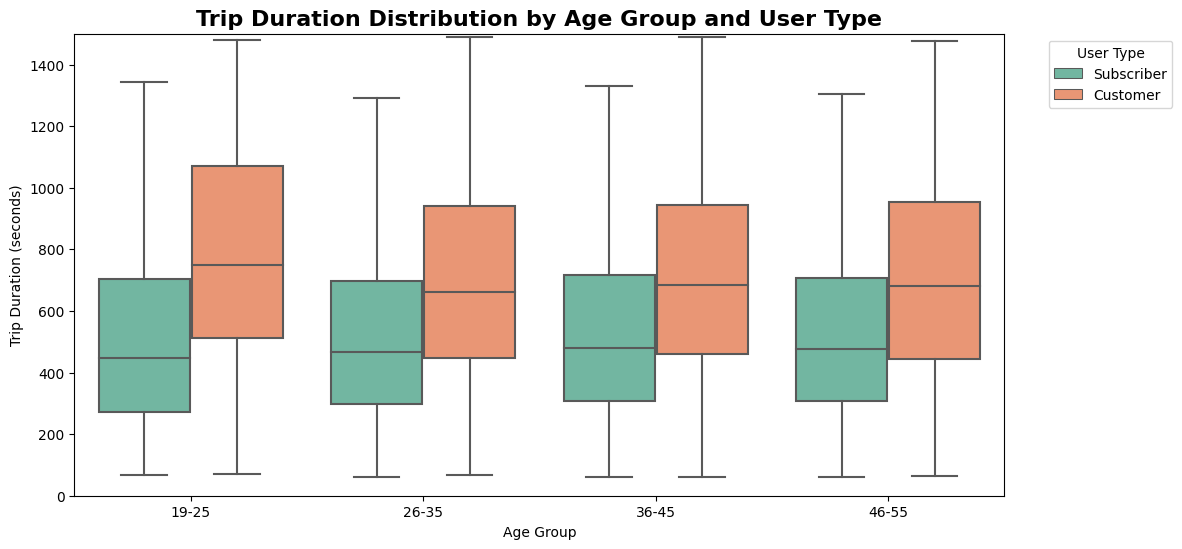

In [9]:
#Assuming the current year is 2024
current_year = 2024
df['age'] = current_year - df['member_birth_year']

# Create age bins for better grouping
age_bins = [18, 25, 35, 45, 55]
age_labels = ['19-25', '26-35', '36-45', '46-55']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Boxplot for trip duration by age group and user type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='duration_sec', hue='user_type', 
            palette='Set2', showfliers=False)
plt.title('Trip Duration Distribution by Age Group and User Type', fontsize=16, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (seconds)')
plt.legend(bbox_to_anchor =(1.04, 1), title='User Type', loc="upper left", fontsize=10)
plt.ylim(0, 1500)
plt.show()

The box plot reveals notable differences in trip duration acrros both age groups and user types.
Generally, Customers(shown in orange) tend to have longer trip durations across all age groups, compared to Subscribers(showen in green). This trend suggest that customers, who are likely casual users, take longer trips, potentially for leisure or sightseeing, while subscribers, who may use the service more regularly, have shorter trips. 
In addtion, as age increases, the median trip duration decreases slightly, with less variation.
This could indicate that younger users(especially non-subscribers) are more likely to engage in longer trips, while older users have more consistent, shorter trips.

## Visualization 3 - Trip Duration by Participation in the bike-share program
Question:Does participation in the bike-share program influnce trip duration ?

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

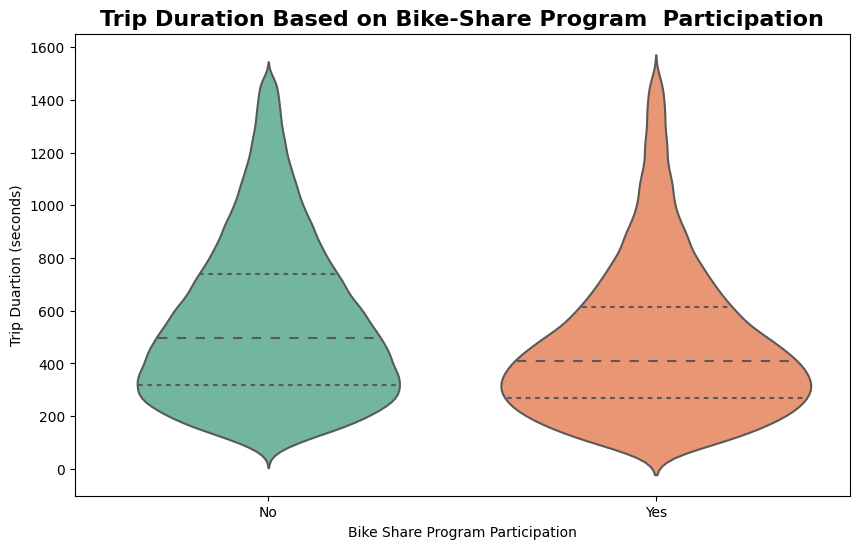

In [66]:
# Create a violin plot to visualize the distribution of trip durations for each group
plt.figure(figsize=(10,6))
sns.violinplot(x='bike_share_for_all_trip', y='duration_sec', data=df, inner="quart", palette="Set2")


#Add title and labels
plt.title('Trip Duration Based on Bike-Share Program  Participation', fontsize=16, fontweight='bold')
plt.xlabel('Bike Share Program Participation')
plt.ylabel('Trip Duartion (seconds)')

#Add custom x-axis labels for 'Yes' and 'No'
plt.xticks([0,1], ['No', 'Yes'])

#Show the Plot
plt.show()

The plot reveals that bike-share program participants tend to have shorter trip duartions compared to non-participant.
This suggest that participation in the bike-share program is associated with more consistent' shorter trips, potentially reflecting the nature of the program, which may cater to shorter, more frequent trips rather than longer ones. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
